<a href="https://colab.research.google.com/github/JamesBredeson/Python/blob/master/Stock1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

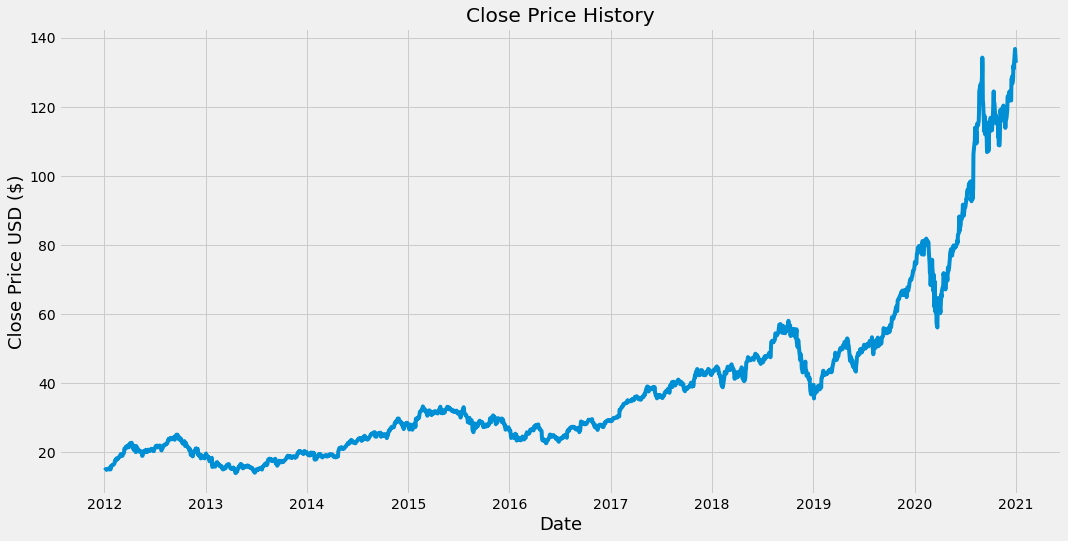

1752/1752 [==============================] - 42s 22ms/step - loss: 4.0603e-04


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


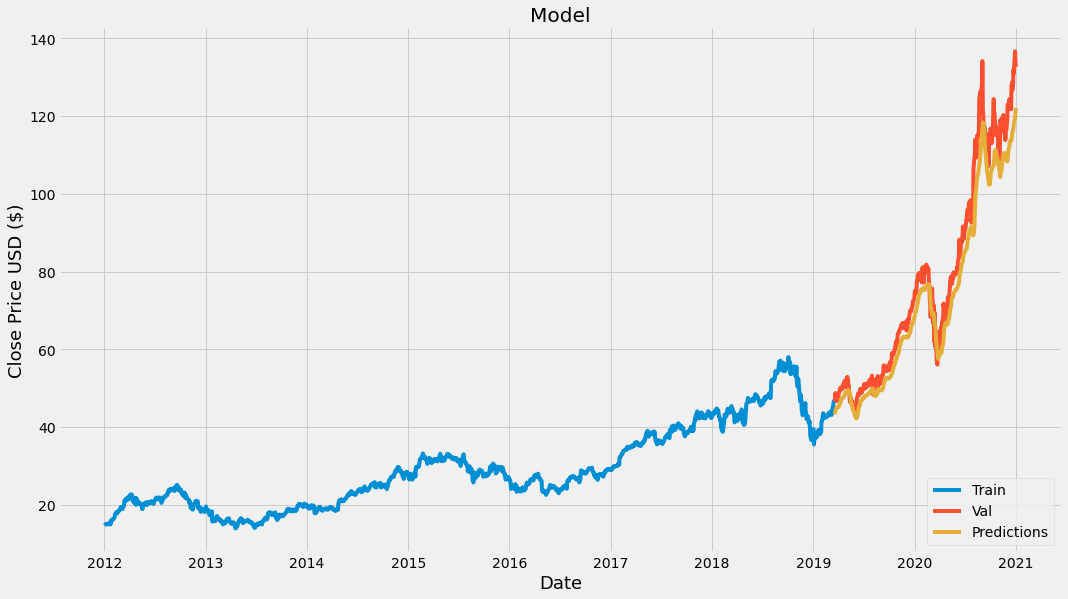

[[120.274155]]
Date
2020-12-01    122.720001
2020-12-02    123.080002
2020-12-03    122.940002
2020-12-04    122.250000
2020-12-07    123.750000
2020-12-08    124.379997
2020-12-09    121.779999
2020-12-10    123.239998
2020-12-11    122.410004
2020-12-14    121.779999
2020-12-15    127.879997
2020-12-16    127.809998
2020-12-17    128.699997
2020-12-18    126.660004
2020-12-21    128.229996
2020-12-22    131.880005
2020-12-23    130.960007
2020-12-24    131.970001
2020-12-28    136.690002
2020-12-29    134.869995
2020-12-30    133.720001
2020-12-31    132.690002
2021-01-04    129.410004
2021-01-05    131.009995
2021-01-06    126.599998
2021-01-07    130.919998
2021-01-08    132.050003
Name: Close, dtype: float64


In [8]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#Get the stock quote 
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-01-01') 
#Show the data 
df

df.shape

#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])#Converting the dataframe to a numpy array
dataset = data.values#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8)

#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

    #Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

#Test data set
test_data = scaled_data[training_data_len - 60: , : ]#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

#Convert x_test to a numpy array 
x_test = np.array(x_test)

#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,9))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

#show the Valid(actual price) compared to predictions
valid

#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2020-12-01', end='2021-01-11')#Create a new dataframe
new_df = apple_quote.filter(['Close'])#Get teh last 60 day closing price 
last_60_days = new_df[-60:].values#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)#Create an empty list
X_test = []#Append teh past 60 days
X_test.append(last_60_days_scaled)#Convert the X_test data set to a numpy array
X_test = np.array(X_test)#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))#Get the predicted scaled price
pred_price = model.predict(X_test)#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

#Get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2020-12-01', end='2021-01-11')
print(apple_quote2['Close'])

